In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
def getLidarData(filePath, maxDistance=1.5, theta1=0, theta2=360):
    polarLidarData = []
    with open(filePath, 'r') as file: 
        csvReader = csv.reader(file)

        for row in csvReader:
            r = float(row[1])/1000
            theta = float(row[0])
            if ((r < maxDistance) & (theta1 <= theta <= theta2) ):
                polarLidarData.append([r,theta])

    return np.array(polarLidarData)

def getCartesianCoordinates(polarData):
    cartesianData = np.zeros((polarData.shape))
    cartesianData[:,0] = -polarData[:,0]*np.cos(polarData[:,1]*math.pi/180)
    cartesianData[:,1] = -polarData[:,0]*np.sin(polarData[:,1]*math.pi/180)
    return cartesianData

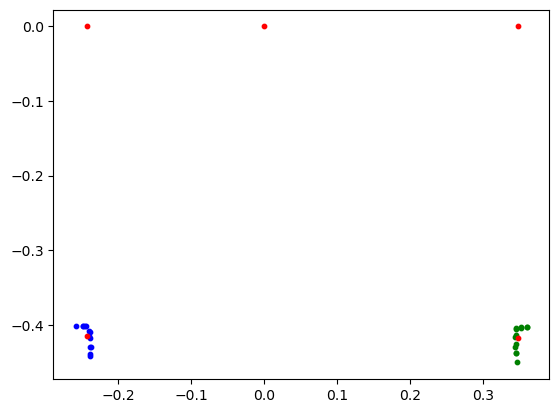

In [27]:
filePath = '../TestData/17-june/test2/raw/e.csv'
col1Data = getLidarData(filePath, maxDistance = 0.7, theta1=45, theta2=90)
col2Data = getLidarData(filePath, maxDistance = 0.7, theta1=90, theta2=135)


#get cartesian coordinates
col1CartPts = getCartesianCoordinates(col1Data)
col2CartPts = getCartesianCoordinates(col2Data)

#plot
plt.scatter(col1CartPts[:,0],col1CartPts[:,1], s=10, color='blue')
plt.scatter(col2CartPts[:,0],col2CartPts[:,1], s=10, color='green')

plt.scatter(col1CartPts[:,0].mean(),col1CartPts[:,1].mean(), s=10, color='red')
plt.scatter(col2CartPts[:,0].mean(),col2CartPts[:,1].mean(), s=10, color='red')

plt.scatter(col1CartPts[:,0].mean(),0, s=10, color='red')
plt.scatter(col2CartPts[:,0].mean(),0, s=10, color='red')

plt.scatter(0,0, s=10, color='red')

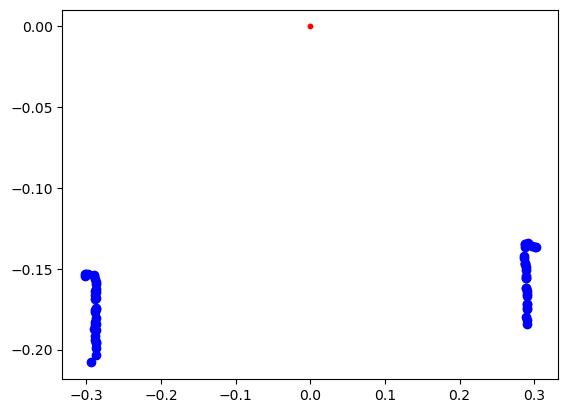

In [33]:
filePath = '../TestData/17-june/test2/raw/f.csv'
lidarData = getLidarData(filePath, maxDistance=0.5, theta1=0, theta2=180)
col1Data = getLidarData(filePath, maxDistance = 0.7, theta1=45, theta2=90)
col2Data = getLidarData(filePath, maxDistance = 0.7, theta1=90, theta2=135)


#get cartesian coordinates
lidarDataCart = getCartesianCoordinates(lidarData)
# col1CartPts = getCartesianCoordinates(col1Data)
# col2CartPts = getCartesianCoordinates(col2Data)

#plot
# plt.scatter(col1CartPts[:,0],col1CartPts[:,1], s=10, color='blue')
# plt.scatter(col2CartPts[:,0],col2CartPts[:,1], s=10, color='green')

# plt.scatter(col1CartPts[:,0].mean(),col1CartPts[:,1].mean(), s=10, color='red')
# plt.scatter(col2CartPts[:,0].mean(),col2CartPts[:,1].mean(), s=10, color='red')

# plt.scatter(col1CartPts[:,0].mean(),0, s=10, color='red')
# plt.scatter(col2CartPts[:,0].mean(),0, s=10, color='red')

plt.scatter(lidarDataCart[:,0], lidarDataCart[:,1], color='blue')
plt.scatter(0,0, s=10, color='red')